In [43]:
#Tareq Tayeh

from __future__ import division
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc, precision_score, recall_score
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interp

In [44]:
#Reading csv values
df = pd.read_excel(r'../Dataset/heart_dataset_complete.xlsx')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,2,130,204,0,2,202,0,0.0,2,0,2,0
1,34,1,1,118,182,0,2,174,0,0.0,2,0,2,0
2,34,0,2,118,210,0,0,192,0,0.7,2,0,2,0
3,35,0,4,138,183,0,0,182,0,1.4,2,0,2,0
4,35,1,4,120,198,0,0,130,1,1.6,1,0,3,1


In [45]:
#Convert question marks to mean values of the corresponding attribute
# df['ca'] = df['ca'].replace('?', 1)
# df['thal'] = df['thal'].replace('?', 2)

In [46]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,2,130,204,0,2,202,0,0.0,2,0,2,0
1,34,1,1,118,182,0,2,174,0,0.0,2,0,2,0
2,34,0,2,118,210,0,0,192,0,0.7,2,0,2,0
3,35,0,4,138,183,0,0,182,0,1.4,2,0,2,0
4,35,1,4,120,198,0,0,130,1,1.6,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,71,0,3,110,265,1,2,130,0,0.0,2,1,2,0
299,71,0,4,112,149,0,0,125,0,1.6,1,0,2,0
300,74,0,2,120,269,0,2,121,1,0.2,2,1,2,0
301,76,0,3,140,197,0,1,116,0,1.1,1,0,2,0


In [47]:
#Split dataframe into x (independant variables) and y (dependant variable)
x_df=df.iloc[1:df.shape[0],0:13]
print(x_df)

y_df=df.iloc[1:df.shape[0],13:14]
print(y_df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1     34    1   1       118   182    0        2      174      0      0.0   
2     34    0   2       118   210    0        0      192      0      0.7   
3     35    0   4       138   183    0        0      182      0      1.4   
4     35    1   4       120   198    0        0      130      1      1.6   
5     35    1   4       126   282    0        2      156      1      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   71    0   3       110   265    1        2      130      0      0.0   
299   71    0   4       112   149    0        0      125      0      1.6   
300   74    0   2       120   269    0        2      121      1      0.2   
301   76    0   3       140   197    0        1      116      0      1.1   
302   77    1   4       125   304    0        2      162      1      0.0   

     slope  ca  thal  
1        2   0     2  
2        2   0     2  
3        2   0    

In [48]:
#Function for entire calculations and model fitting
def model_calculations(x_df, y_df):
    # Converting dataframe into arrays
    x=np.array(x_df)
    y=np.array(y_df)
    # Prepare cross validation
    accuracy_scores = []
    kf = KFold(5, True)
    kf.get_n_splits(x)
    print(kf)
    # Enumerate splits
    for train_index, test_index in kf.split(x):
    #   print("TRAIN:", train_index, "TEST:", test_index)
        print("\nTEST:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Gaussian function of sklearn
        gnb = GaussianNB()
        gnb.fit(x_train, y_train.ravel())
        y_pred = gnb.predict(x_test)
        accuracy_scores.append(metrics.accuracy_score(y_test, y_pred)*100)
        print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
        # convert 2D array to 1D array
        y1=y_test.ravel()
        y_pred1=y_pred.ravel()
        #A confusion matrix is a summary of prediction results on a classification problem.
        #The number of correct and incorrect predictions are summarized with count values and broken down by each class.
        #TP - FN
        #FP - TN
        print("Confusion Matrix")
        cf_matrix=confusion_matrix(y1,y_pred1)
        print(cf_matrix)
        #F1 score = 2*((precision*recall)/(precision+recall))
        #Precision = Number of True Positives divided by the number of True Positives and False Positives.
        #Recall = Number of True Positives divided by the number of True Positives and the number of False Negatives
        print("Precision")
        precision=precision_score(y1,y_pred1,average='weighted')
        print(precision)
        print("Recall")
        recall=recall_score(y1,y_pred1,average='weighted')
        print(recall)
        print("F1 Score")
        f_score=f1_score(y1,y_pred1,average='weighted')
        print(f_score)
        # Matrix from 1D array
        y2=np.zeros(shape=(len(y1),5))
        y3=np.zeros(shape=(len(y_pred1),5))
        for i in range(len(y1)):
            y2[i][int(y1[i])]=1
        for i in range(len(y_pred1)):
            y3[i][int(y_pred1[i])]=1
        # ROC Curve generation
        n_classes = 2

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y2[:, i], y3[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y2.ravel(), y3.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Compute macro-average ROC curve and ROC area
        print("ROC Curve")
        # First aggregate all false positive rates
        lw=2
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure()
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','black'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic for Multi-Class')
        plt.legend(loc="lower right")
        plt.show()

    print(accuracy_scores)
    max_value = max(accuracy_scores)
    min_value = min(accuracy_scores)
    avg_value = sum(accuracy_scores)/len(accuracy_scores)
    print('Max:', max_value)
    print('Min:',min_value)
    print('Avg:',avg_value)

KFold(n_splits=5, random_state=None, shuffle=True)

TEST: [  1   2  11  15  17  18  23  26  29  32  44  49  51  56  58  62  63  66
  68  73  78  80  84  90  94 103 106 107 110 118 120 122 152 157 160 170
 178 188 200 201 204 208 211 217 238 239 245 246 247 249 250 251 252 269
 272 273 274 291 295 296 299]
Gaussian Naive Bayes model accuracy(in %): 83.60655737704919
Confusion Matrix
[[32  6]
 [ 4 19]]
Precision
0.8402914389799635
Recall
0.8360655737704918
F1 Score
0.8372655442327575
ROC Curve


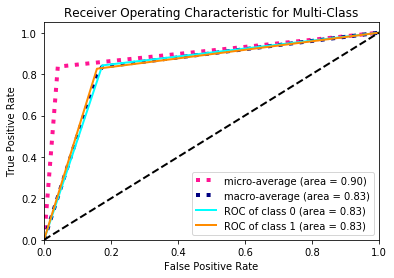


TEST: [  3   5   6  12  20  25  30  31  34  37  46  50  53  54  60  61  76  82
  85  86  92  97 104 105 112 126 128 134 135 137 141 150 163 169 177 186
 191 192 194 198 205 206 207 213 216 226 231 234 235 240 253 254 257 258
 259 263 268 275 282 294 301]
Gaussian Naive Bayes model accuracy(in %): 78.68852459016394
Confusion Matrix
[[27  7]
 [ 6 21]]
Precision
0.7880029806259314
Recall
0.7868852459016393
F1 Score
0.7872322441444048
ROC Curve


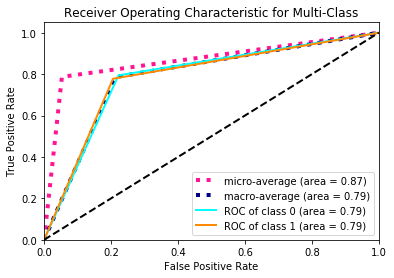


TEST: [  7  10  19  21  33  36  39  41  42  45  47  57  64  79  88  89  91  99
 101 111 119 121 123 131 133 139 140 142 143 145 153 158 164 165 174 179
 184 195 199 202 209 210 214 215 223 233 241 255 256 261 264 265 271 278
 279 285 286 289 293 298]
Gaussian Naive Bayes model accuracy(in %): 81.66666666666667
Confusion Matrix
[[24  5]
 [ 6 25]]
Precision
0.8172222222222223
Recall
0.8166666666666667
F1 Score
0.8167176067426136
ROC Curve


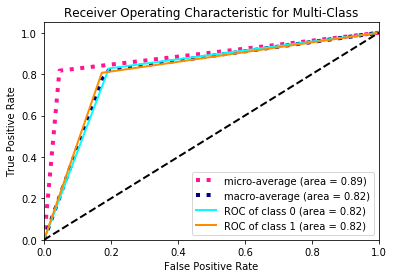


TEST: [  0   4   8  14  16  22  24  27  28  35  38  43  52  67  69  71  72  74
  75  77  87  93  96 102 108 109 115 117 125 127 130 136 144 146 147 154
 162 167 173 175 181 190 193 197 203 219 227 229 230 236 237 242 243 262
 280 283 284 287 292 300]
Gaussian Naive Bayes model accuracy(in %): 86.66666666666667
Confusion Matrix
[[31  0]
 [ 8 21]]
Precision
0.894017094017094
Recall
0.8666666666666667
F1 Score
0.8636190476190477
ROC Curve


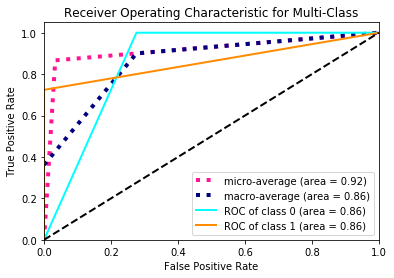


TEST: [  9  13  40  48  55  59  65  70  81  83  95  98 100 113 114 116 124 129
 132 138 148 149 151 155 156 159 161 166 168 171 172 176 180 182 183 185
 187 189 196 212 218 220 221 222 224 225 228 232 244 248 260 266 267 270
 276 277 281 288 290 297]
Gaussian Naive Bayes model accuracy(in %): 83.33333333333334
Confusion Matrix
[[26  5]
 [ 5 24]]
Precision
0.8333333333333334
Recall
0.8333333333333334
F1 Score
0.8333333333333334
ROC Curve


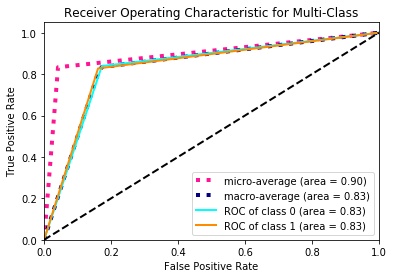

[83.60655737704919, 78.68852459016394, 81.66666666666667, 86.66666666666667, 83.33333333333334]
Max: 86.66666666666667
Min: 78.68852459016394
Avg: 82.79234972677595


In [49]:
model_calculations(x_df, y_df)

In [50]:
# Converting dataframe into arrays
x=np.array(x_df)
y=np.array(y_df)
# Prepare cross validation
accuracy_scores = []
kf = KFold(5, True)
kf.get_n_splits(x)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
# Gaussian function of sklearn
gnb = GaussianNB()
gnb.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
#eli5 provides a way to compute feature importances for any black-box estimator by measuring how score decreases 
#when a feature is not available;

#Permutation importance is calculated after a model has been fitted. So we won't change the model or change what predictions 
#we'd get for a given value. It randomly re-orders a single column of the validation data, leaving the target and all 
#other columns in place, and calculates the prediction accuracy of the now-shuffle data. The process is repeated with 
#multiple shuffles to measure the amount of randomness in the calculation

import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(gnb, random_state = 1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_df.columns.tolist())

Weight,Feature
0.0867 ± 0.0879,ca
0.0767 ± 0.0400,exang
0.0433 ± 0.0452,cp
0.0300 ± 0.0533,oldpeak
0.0167 ± 0.0471,thalach
0.0100 ± 0.0267,thal
0.0033 ± 0.0327,chol
-0.0033 ± 0.0249,trestbps
-0.0033 ± 0.0327,slope
-0.0033 ± 0.0133,fbs


In [52]:
#On average, it looks like the most important factors in terms of permutation are:
# 1) Number of major vessels coloured by fluoroscopy. 
# 2) Slope of peak exercise ST segment
# 3) Exercise induced angina
# 4) Sex
# 5) Chest Pain Type

In [53]:
#Drop age, serum cholesterol, fasting blood sugar, resting blood pressure and resting electrocardiographic results
df = df.drop(columns=['age', 'trestbps', 'chol', 'fbs', 'restecg'])

In [54]:
#Split dataframe into x (independant variables) and y (dependant variable)
x_df=df.iloc[1:df.shape[0],0:8]
print(x_df)

y_df=df.iloc[1:df.shape[0],8:9]
print(y_df)

     sex  cp  thalach  exang  oldpeak  slope  ca  thal
1      1   1      174      0      0.0      2   0     2
2      0   2      192      0      0.7      2   0     2
3      0   4      182      0      1.4      2   0     2
4      1   4      130      1      1.6      1   0     3
5      1   4      156      1      0.0      2   0     3
..   ...  ..      ...    ...      ...    ...  ..   ...
298    0   3      130      0      0.0      2   1     2
299    0   4      125      0      1.6      1   0     2
300    0   2      121      1      0.2      2   1     2
301    0   3      116      0      1.1      1   0     2
302    1   4      162      1      0.0      2   3     2

[302 rows x 8 columns]
     target
1         0
2         0
3         0
4         1
5         1
..      ...
298       0
299       0
300       0
301       0
302       1

[302 rows x 1 columns]


KFold(n_splits=5, random_state=None, shuffle=True)

TEST: [  0   1   2   6   9  19  27  28  30  37  46  47  53  56  66  79  91  92
 107 114 116 121 125 127 137 147 150 156 162 167 171 174 175 176 177 184
 188 203 224 225 226 231 232 233 237 241 243 246 248 253 260 261 264 266
 268 271 277 278 287 295 298]
Gaussian Naive Bayes model accuracy(in %): 83.60655737704919
Confusion Matrix
[[23  2]
 [ 8 28]]
Precision
0.8548915917503966
Recall
0.8360655737704918
F1 Score
0.83739621034703
ROC Curve


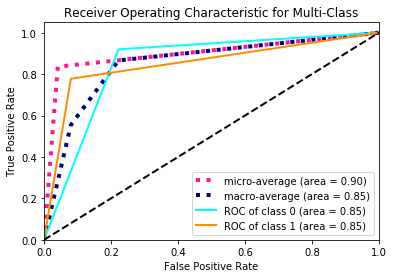


TEST: [  8  11  17  18  21  33  42  43  50  60  68  70  75  81  84  86  87  88
  94  95  97 100 103 109 117 118 119 132 134 138 139 142 143 153 154 159
 160 163 164 166 172 173 179 191 193 194 206 211 213 219 220 221 250 251
 255 274 280 289 294 297 300]
Gaussian Naive Bayes model accuracy(in %): 85.24590163934425
Confusion Matrix
[[27  1]
 [ 8 25]]
Precision
0.8742749054224465
Recall
0.8524590163934426
F1 Score
0.8519033064740206
ROC Curve


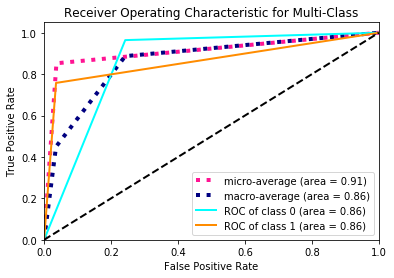


TEST: [  4   7  14  15  16  24  29  32  35  39  41  44  57  59  63  67  76  82
  83 101 106 108 122 128 133 140 144 152 155 157 158 161 165 169 185 186
 190 202 207 208 209 215 216 222 229 236 240 242 258 259 267 270 273 276
 281 286 288 296 299 301]
Gaussian Naive Bayes model accuracy(in %): 86.66666666666667
Confusion Matrix
[[32  4]
 [ 4 20]]
Precision
0.8666666666666667
Recall
0.8666666666666667
F1 Score
0.8666666666666667
ROC Curve


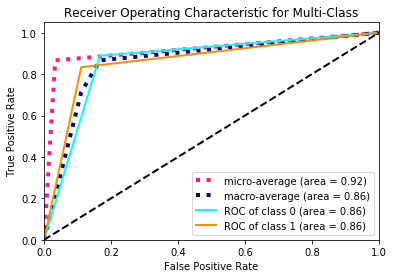


TEST: [  5  12  20  25  26  31  36  38  40  48  49  52  58  69  72  77  85  89
  90  96  99 102 105 110 112 113 115 120 124 135 136 141 145 146 149 168
 182 187 192 195 197 200 210 212 223 234 235 238 239 244 245 256 262 263
 269 272 275 279 283 291]
Gaussian Naive Bayes model accuracy(in %): 86.66666666666667
Confusion Matrix
[[36  7]
 [ 1 16]]
Precision
0.8943987465726596
Recall
0.8666666666666667
F1 Score
0.8716666666666667
ROC Curve


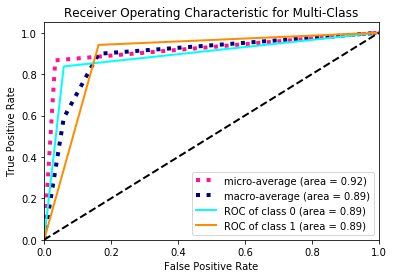


TEST: [  3  10  13  22  23  34  45  51  54  55  61  62  64  65  71  73  74  78
  80  93  98 104 111 123 126 129 130 131 148 151 170 178 180 181 183 189
 196 198 199 201 204 205 214 217 218 227 228 230 247 249 252 254 257 265
 282 284 285 290 292 293]
Gaussian Naive Bayes model accuracy(in %): 78.33333333333333
Confusion Matrix
[[26  5]
 [ 8 21]]
Precision
0.7854826546003015
Recall
0.7833333333333333
F1 Score
0.7824242424242424
ROC Curve


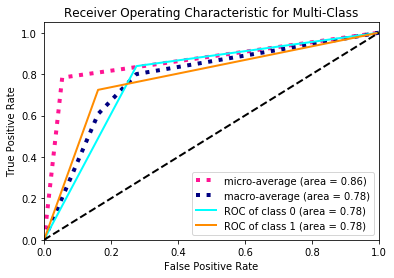

[83.60655737704919, 85.24590163934425, 86.66666666666667, 86.66666666666667, 78.33333333333333]
Max: 86.66666666666667
Min: 78.33333333333333
Avg: 84.10382513661202


In [55]:
model_calculations(x_df, y_df)

In [56]:
# converting dataframe into arrays
x=np.array(x_df)
y=np.array(y_df)
# prepare cross validation
accuracy_scores = []
kf = KFold(5, True)
kf.get_n_splits(x)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
# Gaussian function of sklearn
gnb = GaussianNB()
gnb.fit(x_train, y_train.ravel())
#Permutation Importance
perm = PermutationImportance(gnb, random_state = 1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_df.columns.tolist())

Weight,Feature
0.0700 ± 0.0611,ca
0.0600 ± 0.0718,oldpeak
0.0500 ± 0.0365,sex
0.0467 ± 0.0389,cp
0.0333 ± 0.0298,slope
0.0333 ± 0.0365,thal
0.0300 ± 0.0249,thalach
0.0267 ± 0.0499,exang
